# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
!wget $data -O data-week-3.csv

--2022-07-02 13:41:44--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.05s   

2022-07-02 13:41:44 (19.7 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [4]:
df = pd.read_csv("data-week-3.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df['MultipleLines']

0       No phone service
1                     No
2                     No
3       No phone service
4                     No
              ...       
7038                 Yes
7039                 Yes
7040    No phone service
7041                 Yes
7042                  No
Name: MultipleLines, Length: 7043, dtype: object

In [7]:
df.columns = df.columns.str.lower().str.replace(' ','_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for column_name in categorical_columns:
  df[column_name] = df[column_name].str.lower().str.replace(' ','_')

In [8]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [9]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [10]:
tot_ch = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [11]:
df[tot_ch.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [12]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [13]:
df.totalcharges = df.totalcharges.fillna(0)

In [14]:
df[df.totalcharges.isnull()][['customerid','totalcharges']]

,customerid,totalcharges


In [15]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [16]:
df.churn = (df.churn == 'yes').astype(int)

In [17]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

# Setting Up The Validation Framework

In [18]:
from sklearn.model_selection import  train_test_split 

In [19]:
#train_test_split?
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=1)
len(df_full_train),len(df_test)

(5634, 1409)

In [20]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)
len(df_train),len(df_val)

(4225, 1409)

In [21]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [22]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [23]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# EDA

In [24]:
df_full_train = df_full_train.reset_index(drop = True)
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [25]:
#df_full_train.churn.value_counts() # no     4113 yes    1521
df_full_train.churn.value_counts(normalize = True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [26]:
df_full_train.churn.head()

0    0
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [27]:
print(df_full_train.churn.mean())
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.26996805111821087


0.27

In [28]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

There are 3 numerical variables: tenure, monthlycharges, totalcharges

seniorcitizen is actually categorical

In [29]:
numerical = ['tenure', 'monthlycharges','totalcharges']

In [30]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [31]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [32]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Feature Importance: Churn Rate And Risk Ratio

* Churn Rate
* Risk Ratio
* Mutual Information

Churn Rate

In [33]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [34]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [35]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [36]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [37]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [38]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [39]:
global_churn - churn_partner

0.06493474245795922

In [40]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [41]:
global_churn - churn_no_partner

-0.05984095297455855

# Risk Ratio

In [42]:
churn_no_partner / global_churn

1.2216593879412643

In [43]:
churn_partner / global_churn 

0.7594724924338315

SELECT

    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk

FROM

    data

GROUP BY

    gender;

In [44]:
from IPython.display import display

In [45]:
for category in categorical:
  print(category)
  df_group = df_full_train.groupby(category).churn.agg(['mean','count'])
  df_group['diff'] = df_group['mean'] - global_churn
  df_group['risk'] = df_group['mean'] / global_churn
  display(df_group)

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# Feature Importance: Mutual Information

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

https://en.wikipedia.org/wiki/Mutual_information

In [46]:
from sklearn.metrics import mutual_info_score

In [47]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [48]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [49]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [50]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [51]:
def mutual_info_churn_score(series):
  return mutual_info_score(series, df_full_train.churn)

In [52]:
mut_inf = df_full_train[categorical].apply(mutual_info_churn_score)
mut_inf.sort_values(ascending = False)
#high values are more important

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# Feature Importance: Correlation

How about numerical columns ? 

- Correlation Coefficient

In [53]:
df_full_train.tenure.max()

72

In [54]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [55]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [56]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [57]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

tenur has negative corr

In [58]:
df_full_train.monthlycharges.max()

118.65

In [59]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [60]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [61]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

monthlycharges has positive corr

In [62]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

# One-Hot Encoding

In [63]:
from sklearn.feature_extraction import DictVectorizer

In [64]:
df_train[['gender','contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [65]:
dicts = df_train[['gender','contract']].to_dict(orient='records')

In [66]:
dict_vec = DictVectorizer(sparse = False) 

In [67]:
dict_vec.fit(dicts)

DictVectorizer(sparse=False)

In [68]:
dict_vec.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [69]:
dict_vec.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.]])

In [70]:
dicts = df_train[['gender','contract','tenure']].to_dict(orient='records')

In [71]:
dicts[0]

{'contract': 'two_year', 'gender': 'female', 'tenure': 72}

In [72]:
dict_vec = DictVectorizer(sparse = False) 
dict_vec.fit(dicts)
dict_vec.get_feature_names_out()


array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male', 'tenure'],
      dtype=object)

In [73]:
dict_vec.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       ...,
       [ 1.,  0.,  0.,  0.,  1.,  2.],
       [ 0.,  0.,  1.,  1.,  0., 27.],
       [ 1.,  0.,  0.,  1.,  0.,  9.]])

In [74]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [75]:
train_dicts[0]

{'contract': 'two_year',
 'dependents': 'yes',
 'deviceprotection': 'yes',
 'gender': 'female',
 'internetservice': 'fiber_optic',
 'monthlycharges': 115.5,
 'multiplelines': 'yes',
 'onlinebackup': 'yes',
 'onlinesecurity': 'yes',
 'paperlessbilling': 'yes',
 'partner': 'yes',
 'paymentmethod': 'electronic_check',
 'phoneservice': 'yes',
 'seniorcitizen': 0,
 'streamingmovies': 'yes',
 'streamingtv': 'yes',
 'techsupport': 'yes',
 'tenure': 72,
 'totalcharges': 8425.15}

In [76]:
dict_vec = DictVectorizer(sparse = False) 
dict_vec.fit(train_dicts)
dict_vec.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [77]:
dict_vec.transform(train_dicts)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [78]:
list(dict_vec.transform(train_dicts[:5])[0])

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

In [79]:
X_train = dict_vec.fit_transform(train_dicts)

In [80]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [81]:
X_val = dict_vec.transform(val_dicts)

#  Logistic Regression

In [82]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [83]:
z = np.linspace(-5, 5, 51)

In [84]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

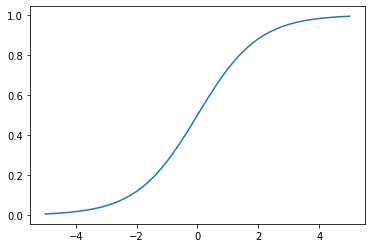

In [85]:
plt.plot(z, sigmoid(z))

In [86]:
def linear_regression(xi):
  result = w0

  for j in range(len(w)):
    result = result + xi[j] * w[j]

  return result

In [87]:
def linear_regression(xi):
  result = w0

  for j in range(len(w)):
    result = result + xi[j] * w[j]
  
  result = sigmoid(score)
  return result

# Training Logistic Regression with Scikit-Learn

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [91]:
model.intercept_[0]

-0.10903461122930498

In [92]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [93]:
model.predict(X_train) # hard prediction

array([0, 1, 1, ..., 1, 0, 1])

In [94]:
model.predict_proba(X_train) # soft prediction

array([[0.90451531, 0.09548469],
       [0.32067017, 0.67932983],
       [0.36632206, 0.63367794],
       ...,
       [0.46838428, 0.53161572],
       [0.95746004, 0.04253996],
       [0.30127008, 0.69872992]])

In [95]:
y_pred = model.predict_proba(X_val)[:,1]

In [97]:
churn_decision = (y_pred >= 0.5)

In [98]:
(y_val == churn_decision).mean()

0.8034066713981547

In [99]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [100]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [101]:
df_pred.correct.mean()

0.8034066713981547

In [102]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

# Model Interpretation

- Look at the coefficients
- Train a smaller model with fewer features

In [103]:
a = [1, 2, 3, 4]
b = 'abcd'

In [104]:
dict(zip(a,b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [105]:
dict(zip(dict_vec.get_feature_names(), model.coef_[0].round(3)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [106]:
small = ['contract', 'tenure', 'monthlycharges']

In [107]:
df_train[small].iloc[:10].to_dict(orient = 'records')

[{'contract': 'two_year', 'monthlycharges': 115.5, 'tenure': 72},
 {'contract': 'month-to-month', 'monthlycharges': 95.25, 'tenure': 10},
 {'contract': 'month-to-month', 'monthlycharges': 75.55, 'tenure': 5},
 {'contract': 'month-to-month', 'monthlycharges': 80.85, 'tenure': 5},
 {'contract': 'two_year', 'monthlycharges': 20.1, 'tenure': 18},
 {'contract': 'month-to-month', 'monthlycharges': 30.5, 'tenure': 4},
 {'contract': 'month-to-month', 'monthlycharges': 75.1, 'tenure': 1},
 {'contract': 'month-to-month', 'monthlycharges': 70.3, 'tenure': 1},
 {'contract': 'two_year', 'monthlycharges': 19.75, 'tenure': 72},
 {'contract': 'month-to-month', 'monthlycharges': 109.9, 'tenure': 6}]

In [108]:
dicts_train_small = df_train[small].to_dict(orient = 'records')
dicts_val_small = df_val[small].to_dict(orient = 'records')

In [110]:
dict_vec_small = DictVectorizer(sparse = False)
dict_vec_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [111]:
dict_vec_small.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [112]:
X_train_small = dict_vec.transform(dicts_train_small)

In [113]:
model_small = LogisticRegression(solver = 'lbfgs')
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [115]:
w0 = model_small.intercept_[0]
w0

-2.4767756619506143

In [117]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.027,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   , -0.036,  0.   ])

In [120]:
dict(zip(dict_vec_small.get_feature_names(), w.round(3)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.0,
 'tenure': 0.0}

In [121]:
-2.47 + (-0.949) + 30*0.027 + 24*(-0.036)

-3.473

In [122]:
sigmoid(_)

0.030090303318277657

# Using the model

In [123]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient = 'records')

In [125]:
dict_vec = DictVectorizer(sparse = False)
X_full_train = dict_vec.fit_transform(dicts_full_train)

In [126]:
y_full_train = df_full_train.churn.values

In [127]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [128]:
dicts_test = df_test[categorical + numerical].to_dict(orient = 'records')

In [129]:
X_test = dict_vec.transform(dicts_test)

In [130]:
y_pred = model.predict_proba(X_test)[:,1]

In [131]:
churn_decision = (y_pred >0.5)

In [132]:
(churn_decision == y_test).mean()

0.815471965933286

In [133]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [134]:
customer = dicts_test[-1]
customer

{'contract': 'month-to-month',
 'dependents': 'yes',
 'deviceprotection': 'yes',
 'gender': 'female',
 'internetservice': 'fiber_optic',
 'monthlycharges': 104.2,
 'multiplelines': 'yes',
 'onlinebackup': 'no',
 'onlinesecurity': 'yes',
 'paperlessbilling': 'yes',
 'partner': 'yes',
 'paymentmethod': 'electronic_check',
 'phoneservice': 'yes',
 'seniorcitizen': 0,
 'streamingmovies': 'yes',
 'streamingtv': 'yes',
 'techsupport': 'no',
 'tenure': 17,
 'totalcharges': 1743.5}

In [135]:
X_small = dict_vec.transform([customer])

In [136]:
model.predict_proba(X_small)[0,1]

0.5968852088243913

In [137]:
y_test[-1]

1

# Accuracy and Dummy Model

In [141]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dict_vec.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8019872249822569

In [142]:
len(y_val)

1409

In [143]:
(y_val == churn_decision).mean()

0.8019872249822569

In [145]:
from sklearn.metrics import accuracy_score

In [146]:
accuracy_score(y_val, y_pred >= 0.5)

0.8019872249822569

In [148]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
  score = accuracy_score(y_val, y_pred >=t)
  print('%.2f %.3f' % (t, score))
  scores.append(score)

0.00 0.274
0.05 0.495
0.10 0.590
0.15 0.664
0.20 0.720
0.25 0.754
0.30 0.774
0.35 0.779
0.40 0.785
0.45 0.796
0.50 0.802
0.55 0.815
0.60 0.803
0.65 0.790
0.70 0.778
0.75 0.759
0.80 0.737
0.85 0.727
0.90 0.726
0.95 0.726
1.00 0.726


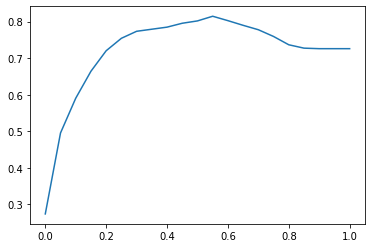

In [149]:
plt.plot(thresholds, scores)

In [150]:
#from collections import Counter

In [151]:
#Counter(y_pred >= 1.0)

Counter({False: 1409})

In [152]:
#1 - y_val.mean()

0.7260468417317246

# Confusion Table

In [153]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [154]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [155]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [156]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[920, 103],
       [176, 210]])

In [157]:
(confusion_matrix / confusion_matrix.sum()).round(2)


array([[0.65, 0.07],
       [0.12, 0.15]])

In [158]:
# Precision and Recall
p = tp / (tp + fp)
p

0.670926517571885

In [159]:
r = tp / (tp + fn)
r

0.5440414507772021

In [165]:
y_pred_binary = y_pred.copy()
for i in range(len(y_pred)):
  if y_pred_binary[i] >= 0.5:
    y_pred_binary[i] = 1
  else:
    y_pred_binary[i] = 0

In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred_binary)

array([[920, 103],
       [176, 210]])

In [169]:
from sklearn.metrics import recall_score
recall_score(y_val, y_pred_binary)

0.5440414507772021

In [170]:
from sklearn.metrics import precision_score
precision_score(y_val, y_pred_binary)

0.670926517571885

# ROC Curves

TPR and FRP

In [171]:
tpr = tp / (tp + fn)
tpr

0.5440414507772021

In [172]:
fpr = fp / (fp + tn)
fpr

0.10068426197458455

In [173]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [174]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

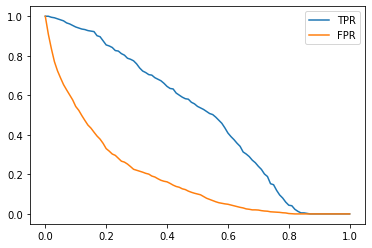

In [175]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

## Random Model

In [176]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [177]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [178]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [179]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

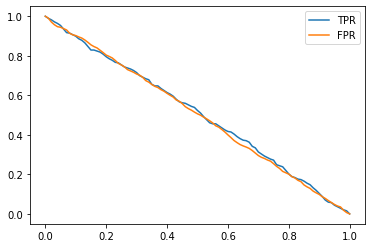

In [180]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

## Ideal Model

In [181]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [182]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

y_ideal_pred = np.linspace(0, 1, len(y_val))


In [183]:
1 - y_val.mean()

0.7260468417317246

In [184]:
accuracy_score(y_ideal, y_ideal_pred >= 0.726)

1.0

In [185]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


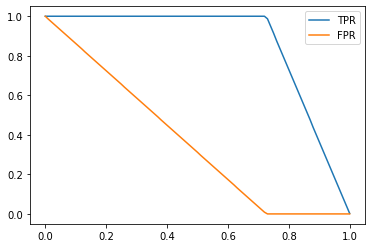

In [186]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

## Putting everything together

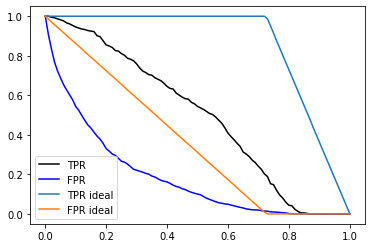

In [187]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='black')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='blue')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR ideal')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR random', color='grey')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR random', color='grey')

plt.legend()


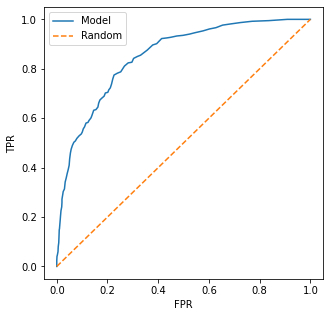

In [188]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [189]:
from sklearn.metrics import roc_curve

In [190]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

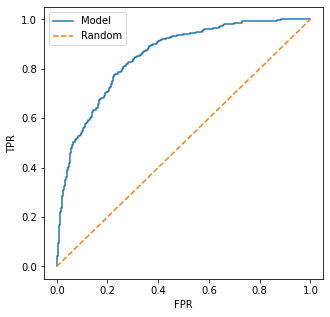

In [191]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

# ROC AUC

In [192]:
from sklearn.metrics import auc

In [193]:
auc(fpr, tpr)

0.8510831193431895

In [194]:
auc(df_scores.fpr, df_scores.tpr)

0.8505943607899149

In [195]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [196]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8510831193431895

In [197]:
from sklearn.metrics import roc_auc_score

In [198]:
roc_auc_score(y_val, y_pred)

0.8510831193431895

In [199]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [200]:
import random

In [201]:
n = 100000
success = 0 

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.85251

In [202]:
n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

0.85354

# Cross-Validation

- Evaluating the same model on different subsets of data
- Getting the average prediction and the spread within predictions

In [203]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [204]:
dv, model = train(df_train, y_train, C=0.001)

In [205]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [206]:
y_pred = predict(df_val, dv, model)

In [207]:
from sklearn.model_selection import KFold

In [208]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [209]:
from tqdm.auto import tqdm

In [210]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.009
C=0.1 0.841 +- 0.007
C=0.5 0.840 +- 0.006
C=1 0.840 +- 0.008
C=5 0.841 +- 0.008
C=10 0.842 +- 0.008


In [211]:
scores

[0.8437252239169172,
 0.8458461627598993,
 0.8325265904073851,
 0.8329702788258618,
 0.8525462018763139]

In [212]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259